In [ ]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.fna.gz

--2025-05-22 14:03:23--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.12, 130.14.250.7, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1379902 (1.3M) [application/x-gzip]
Saving to: ‘GCF_000005845.2_ASM584v2_genomic.fna.gz’

GCF_000005845.2_ASM 100%[===================>]   1.32M  --.-KB/s    in 0.1s    

2025-05-22 14:03:23 (11.3 MB/s) - ‘GCF_000005845.2_ASM584v2_genomic.fna.gz’ saved [1379902/1379902]



In [ ]:
!ls -hlrt

total 1.4M
-rw-r--r-- 1 root root 1.4M Oct 31  2014 GCF_000005845.2_ASM584v2_genomic.fna.gz
drwxr-xr-x 1 root root 4.0K May 14 13:38 sample_data


In [ ]:
!gzip -d GCF_000005845.2_ASM584v2_genomic.fna.gz

In [ ]:
!ls -hlrt

total 4.5M
-rw-r--r-- 1 root root 4.5M Oct 31  2014  GCF_000005845.2_ASM584v2_genomic.fna
drwxr-xr-x 1 root root 4.0K May 14 13:38  sample_data
-rw-r--r-- 1 root root 8.2K May 22 09:03 '83338241991?pwd=4Olrrp0PMbmu5hroMecZ3BdsyvESZi.1'


In [ ]:
!head GCF_000005845.2_ASM584v2_genomic.fna

>NC_000913.3 Escherichia coli str. K-12 substr. MG1655, complete genome
AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTG
GTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGAC
AGATAAAAATTACAGAGTACACAACATCCATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGT
AACGGTGCGGGCTGACGCGTACAGGAAACACAGAAAAAAGCCCGCACCTGACAGTGCGGGCTTTTTTTTTCGACCAAAGG
TAACGAGGTAACAACCATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCG
ATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTG
GCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTTT
GACGGGACTCGCCGCCGCCCAGCCGGGGTTCCCGCTGGCGCAATTGAAAACTTTCGTCGATCAGGAATTTGCCCAAATAA
AACATGTCCTGCATGGCATTAGTTTGTTGGGGCAGTGCCCGGATAGCATCAACGCTGCGCTGATTTGCCGTGGCGAGAAA


In [ ]:
def parse_fasta(filepath):
    header = None
    sequence_lines = []

    with open(filepath, 'r') as file:
        for line in file:
            line = line.strip()  # Удаляем пробелы и символы новой строки
            if not line:
                continue  # Пропускаем пустые строки
            if line.startswith('>'):
                if header is not None:
                    # Если уже есть заголовок, вернуть его и накопленную последовательность
                    yield header, ''.join(sequence_lines)
                header = line[1:]  # Убираем '>' в начале
                sequence_lines = []  # Сброс буфера для новой последовательности
            else:
                sequence_lines.append(line)

        # Возвращаем последнюю последовательность в файле
        if header is not None:
            yield header, ''.join(sequence_lines)

fasta_path = "GCF_000005845.2_ASM584v2_genomic.fna"

for header, sequence in parse_fasta(fasta_path):
    print("Header:", header)
    print("Sequence:", sequence[:60] + '...')  # Показать первые 60 символов

Header: NC_000913.3 Escherichia coli str. K-12 substr. MG1655, complete genome
Sequence: AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTC...


In [ ]:
def reverse_complement(dna_seq):
    complement = {
        'A': 'T',
        'T': 'A',
        'G': 'C',
        'C': 'G',
        'a': 't',
        't': 'a',
        'g': 'c',
        'c': 'g',
        'N': 'N',
        'n': 'n'
    }
    reversed_seq = dna_seq[::-1]
    rev_comp = ''.join(complement.get(base, base) for base in reversed_seq)
    return rev_comp

In [ ]:
len(sequence)

4641652

In [ ]:
rev_comp_sequence = reverse_complement(sequence)

In [ ]:
methionine = "ATG"
methionine_rc = "CAT"
hits, hits_rc = sequence.count(methionine), sequence.count(methionine_rc)

In [ ]:
hits, hits_rc, hits + hits_rc

(76282, 77041, 153323)

In [ ]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz

--2025-05-22 14:03:37--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.12, 130.14.250.7, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 433547 (423K) [application/x-gzip]
Saving to: ‘GCF_000005845.2_ASM584v2_genomic.gff.gz’

GCF_000005845.2_ASM 100%[===================>] 423.39K  1.33MB/s    in 0.3s    

2025-05-22 14:03:37 (1.33 MB/s) - ‘GCF_000005845.2_ASM584v2_genomic.gff.gz’ saved [433547/433547]



In [ ]:
!gzip -d GCF_000005845.2_ASM584v2_genomic.gff.gz

In [ ]:
!head GCF_000005845.2_ASM584v2_genomic.gff

##gff-version 3
#!gff-spec-version 1.21
#!processor NCBI annotwriter
#!genome-build ASM584v2
#!genome-build-accession NCBI_Assembly:GCF_000005845.2
##sequence-region NC_000913.3 1 4641652
##species https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=511145
NC_000913.3	RefSeq	region	1	4641652	.	+	.	ID=NC_000913.3:1..4641652;Dbxref=taxon:511145;Is_circular=true;Name=ANONYMOUS;gbkey=Src;genome=chromosome;mol_type=genomic DNA;strain=K-12;substrain=MG1655
NC_000913.3	RefSeq	gene	190	255	.	+	.	ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:EG11277,GeneID:944742;Name=thrL;gbkey=Gene;gene=thrL;gene_biotype=protein_coding;gene_synonym=ECK0001;locus_tag=b0001
NC_000913.3	RefSeq	CDS	190	255	.	+	0	ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=UniProtKB/Swiss-Prot:P0AD86,GenBank:NP_414542.1,ASAP:ABE-0000006,ECOCYC:EG11277,GeneID:944742;Name=NP_414542.1;gbkey=CDS;gene=thrL;locus_tag=b0001;orig_transcript_id=gnl|b0001|mrna.NP_414542;product=thr operon leader peptide;protein_id=NP_414542.1;transl_

In [ ]:
!tail !head GCF_000005845.2_ASM584v2_genomic.gff

tail: cannot open '!head' for reading: No such file or directory
==> GCF_000005845.2_ASM584v2_genomic.gff <==
NC_000913.3	RefSeq	CDS	4638178	4639530	.	+	0	ID=cds-NP_418817.1;Parent=gene-b4400;Dbxref=UniProtKB/Swiss-Prot:P08369,GenBank:NP_418817.1,ASAP:ABE-0014432,ECOCYC:EG10145,GeneID:948868;Name=NP_418817.1;gbkey=CDS;gene=creD;locus_tag=b4400;orig_transcript_id=gnl|b4400|mrna.NP_418817;product=putative inner membrane protein CreD;protein_id=NP_418817.1;transl_table=11
NC_000913.3	RefSeq	gene	4639590	4640306	.	-	.	ID=gene-b4401;Dbxref=ASAP:ABE-0014434,ECOCYC:EG10061,GeneID:948874;Name=arcA;gbkey=Gene;gene=arcA;gene_biotype=protein_coding;gene_synonym=cpxC,dye,ECK4393,fexA,msp,seg,sfrA;locus_tag=b4401
NC_000913.3	RefSeq	CDS	4639590	4640306	.	-	0	ID=cds-NP_418818.1;Parent=gene-b4401;Dbxref=UniProtKB/Swiss-Prot:P0A9Q1,GenBank:NP_418818.1,ASAP:ABE-0014434,ECOCYC:EG10061,GeneID:948874;Name=NP_418818.1;gbkey=CDS;gene=arcA;locus_tag=b4401;orig_transcript_id=gnl|b4401|mrna.NP_418818;product=DN

In [ ]:
def parse_gff(filepath):
    annotations = []
    with open(filepath, 'r') as file:
        for line in file:
            line = line.strip()
            if not line or line.startswith('#'):
                continue  # Пропускаем комментарии и пустые строки

            parts = line.split('\t')
            if len(parts) != 9:
                continue  # Пропускаем некорректные строки

            seqid, source, feature_type, start, end, score, strand, phase, attributes = parts

            # Парсим колонку attributes в словарь
            attr_dict = {}
            for attr in attributes.split(';'):
                if '=' in attr:
                    key, value = attr.split('=', 1)
                    attr_dict[key] = value

            annotations.append({
                'seqid': seqid,
                'source': source,
                'type': feature_type,
                'start': int(start),
                'end': int(end),
                'score': score if score != '.' else None,
                'strand': strand,
                'phase': phase if phase != '.' else None,
                'attributes': attr_dict
            })

    return annotations

In [ ]:
annotations = parse_gff("GCF_000005845.2_ASM584v2_genomic.gff")

In [ ]:
annotations[:2]

[{'seqid': 'NC_000913.3',
  'source': 'RefSeq',
  'type': 'region',
  'start': 1,
  'end': 4641652,
  'score': None,
  'strand': '+',
  'phase': None,
  'attributes': {'ID': 'NC_000913.3:1..4641652',
   'Dbxref': 'taxon:511145',
   'Is_circular': 'true',
   'Name': 'ANONYMOUS',
   'gbkey': 'Src',
   'genome': 'chromosome',
   'mol_type': 'genomic DNA',
   'strain': 'K-12',
   'substrain': 'MG1655'}},
 {'seqid': 'NC_000913.3',
  'source': 'RefSeq',
  'type': 'gene',
  'start': 190,
  'end': 255,
  'score': None,
  'strand': '+',
  'phase': None,
  'attributes': {'ID': 'gene-b0001',
   'Dbxref': 'ASAP:ABE-0000006,ECOCYC:EG11277,GeneID:944742',
   'Name': 'thrL',
   'gbkey': 'Gene',
   'gene': 'thrL',
   'gene_biotype': 'protein_coding',
   'gene_synonym': 'ECK0001',
   'locus_tag': 'b0001'}},
 {'seqid': 'NC_000913.3',
  'source': 'RefSeq',
  'type': 'CDS',
  'start': 190,
  'end': 255,
  'score': None,
  'strand': '+',
  'phase': '0',
  'attributes': {'ID': 'cds-NP_414542.1',
   'Parent'

In [ ]:
def pretty_print_gff(features):
    for i, feature in enumerate(features, 1):
        print(f"Feature {i}:")
        print(f"  Type     : {feature['type']}")
        print(f"  Location : {feature['seqid']}:{feature['start']}..{feature['end']} ({feature['strand']})")
        if feature['score'] is not None:
            print(f"  Score    : {feature['score']}")
        if feature['phase'] is not None:
            print(f"  Phase    : {feature['phase']}")
        print(f"  Source   : {feature['source']}")
        if feature['attributes']:
            print(f"  Attributes:")
            for key, value in feature['attributes'].items():
                print(f"    - {key}: {value}")
        print("-" * 50)

In [ ]:
pretty_print_gff(annotations[:10])

Feature 1:
  Type     : region
  Location : NC_000913.3:1..4641652 (+)
  Source   : RefSeq
  Attributes:
    - ID: NC_000913.3:1..4641652
    - Dbxref: taxon:511145
    - Is_circular: true
    - Name: ANONYMOUS
    - gbkey: Src
    - genome: chromosome
    - mol_type: genomic DNA
    - strain: K-12
    - substrain: MG1655
--------------------------------------------------
Feature 2:
  Type     : gene
  Location : NC_000913.3:190..255 (+)
  Source   : RefSeq
  Attributes:
    - ID: gene-b0001
    - Dbxref: ASAP:ABE-0000006,ECOCYC:EG11277,GeneID:944742
    - Name: thrL
    - gbkey: Gene
    - gene: thrL
    - gene_biotype: protein_coding
    - gene_synonym: ECK0001
    - locus_tag: b0001
--------------------------------------------------
Feature 3:
  Type     : CDS
  Location : NC_000913.3:190..255 (+)
  Phase    : 0
  Source   : RefSeq
  Attributes:
    - ID: cds-NP_414542.1
    - Parent: gene-b0001
    - Dbxref: UniProtKB/Swiss-Prot:P0AD86,GenBank:NP_414542.1,ASAP:ABE-0000006,ECOCYC:EG

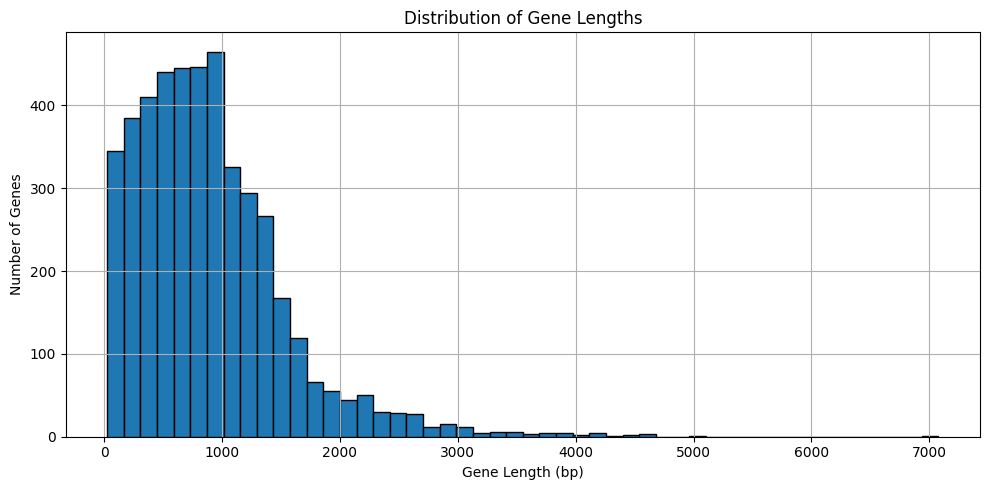

Shortest gene:
  ID      : gene-b4737
  Name    : ymdG
  Product : -
  Length  : 27 bp

Longest gene:
  ID      : gene-b1978
  Name    : yeeJ
  Product : -
  Length  : 7077 bp


In [ ]:
import matplotlib.pyplot as plt

def parse_gff(filepath):
    annotations = []
    with open(filepath, 'r') as file:
        for line in file:
            line = line.strip()
            if not line or line.startswith('#'):
                continue
            parts = line.split('\t')
            if len(parts) != 9:
                continue
            seqid, source, feature_type, start, end, score, strand, phase, attributes = parts
            attr_dict = {}
            for attr in attributes.split(';'):
                if '=' in attr:
                    key, value = attr.split('=', 1)
                    attr_dict[key] = value
            annotations.append({
                'seqid': seqid,
                'source': source,
                'type': feature_type,
                'start': int(start),
                'end': int(end),
                'score': score if score != '.' else None,
                'strand': strand,
                'phase': phase if phase != '.' else None,
                'attributes': attr_dict
            })
    return annotations

def plot_gene_lengths(gff_file):
    features = parse_gff(gff_file)
    genes = [f for f in features if f['type'] == 'gene']
    gene_lengths = [gene['end'] - gene['start'] + 1 for gene in genes]
    gene_ids = [gene['attributes'].get('ID', 'unknown') for gene in genes]

    # Находим самый короткий и самый длинный ген
    min_index = gene_lengths.index(min(gene_lengths))
    max_index = gene_lengths.index(max(gene_lengths))
    min_gene = {'id': gene_ids[min_index], 'length': gene_lengths[min_index]}
    max_gene = {'id': gene_ids[max_index], 'length': gene_lengths[max_index]}

    # Строим гистограмму
    plt.figure(figsize=(10, 5))
    plt.hist(gene_lengths, bins=50, edgecolor='black')
    plt.title("Distribution of Gene Lengths")
    plt.xlabel("Gene Length (bp)")
    plt.ylabel("Number of Genes")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Выводим информацию
    print(f"Shortest gene: {min_gene['id']} ({min_gene['length']} bp)")
    print(f"Longest gene:  {max_gene['id']} ({max_gene['length']} bp)")


def plot_gene_lengths(gff_file):
    features = parse_gff(gff_file)
    genes = [f for f in features if f['type'] == 'gene']
    gene_lengths = [gene['end'] - gene['start'] + 1 for gene in genes]

    # Получаем данные для подписи
    def get_gene_info(gene):
        attrs = gene['attributes']
        return {
            'id': attrs.get('ID', 'unknown'),
            'gene': attrs.get('gene', '-'),
            'product': attrs.get('product', '-'),
            'length': gene['end'] - gene['start'] + 1
        }

    # Находим самый короткий и самый длинный
    min_index = gene_lengths.index(min(gene_lengths))
    max_index = gene_lengths.index(max(gene_lengths))
    min_gene = get_gene_info(genes[min_index])
    max_gene = get_gene_info(genes[max_index])

    # Строим гистограмму
    plt.figure(figsize=(10, 5))
    plt.hist(gene_lengths, bins=50, edgecolor='black')
    plt.title("Distribution of Gene Lengths")
    plt.xlabel("Gene Length (bp)")
    plt.ylabel("Number of Genes")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Печатаем результат
    print(f"Shortest gene:")
    print(f"  ID      : {min_gene['id']}")
    print(f"  Name    : {min_gene['gene']}")
    print(f"  Product : {min_gene['product']}")
    print(f"  Length  : {min_gene['length']} bp")

    print(f"\nLongest gene:")
    print(f"  ID      : {max_gene['id']}")
    print(f"  Name    : {max_gene['gene']}")
    print(f"  Product : {max_gene['product']}")
    print(f"  Length  : {max_gene['length']} bp")

# Пример запуска
gff_path = "GCF_000005845.2_ASM584v2_genomic.gff"  # замените на путь к вашему GFF-файлу
plot_gene_lengths(gff_path)

In [ ]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/009/914/755/GCF_009914755.1_T2T-CHM13v2.0/GCF_009914755.1_T2T-CHM13v2.0_genomic.gff.gz

--2025-05-22 09:35:59--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/009/914/755/GCF_009914755.1_T2T-CHM13v2.0/GCF_009914755.1_T2T-CHM13v2.0_genomic.gff.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.13, 130.14.250.31, 130.14.250.7, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79063589 (75M) [application/x-gzip]
Saving to: ‘GCF_009914755.1_T2T-CHM13v2.0_genomic.gff.gz’

GCF_009914755.1_T2T 100%[===================>]  75.40M  20.4MB/s    in 4.9s    

2025-05-22 09:36:05 (15.4 MB/s) - ‘GCF_009914755.1_T2T-CHM13v2.0_genomic.gff.gz’ saved [79063589/79063589]



In [ ]:
!gzip -d GCF_009914755.1_T2T-CHM13v2.0_genomic.gff.gz

In [ ]:
!ls -hlrt

total 1.6G
-rw-r--r-- 1 root root 4.5M Oct 31  2014  GCF_000005845.2_ASM584v2_genomic.fna
-rw-r--r-- 1 root root 2.6M Jun 18  2023  GCF_000005845.2_ASM584v2_genomic.gff
-rw-r--r-- 1 root root 1.6G Aug 27  2024  GCF_009914755.1_T2T-CHM13v2.0_genomic.gff
drwxr-xr-x 1 root root 4.0K May 14 13:38  sample_data
-rw-r--r-- 1 root root 8.2K May 22 09:03 '83338241991?pwd=4Olrrp0PMbmu5hroMecZ3BdsyvESZi.1'


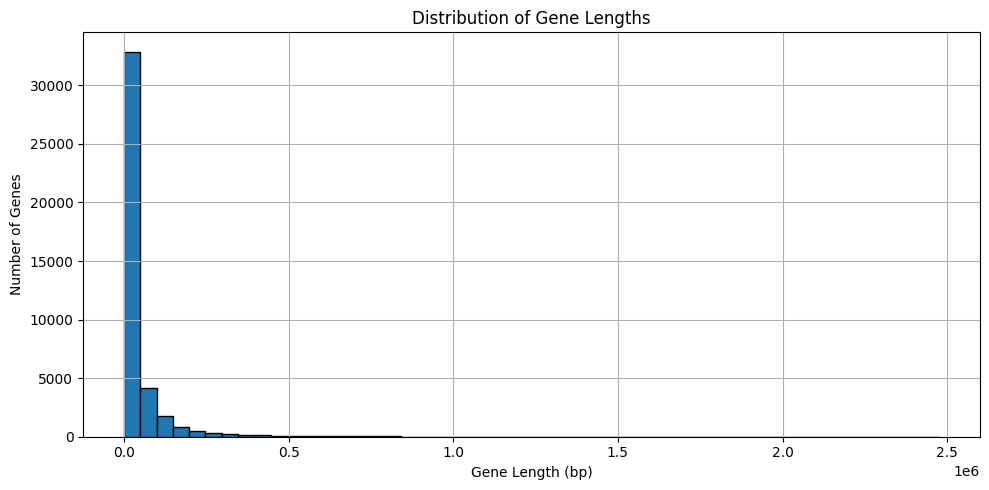

Shortest gene:
  ID      : gene-TRDD1
  Name    : TRDD1
  Product : -
  Length  : 8 bp

Longest gene:
  ID      : gene-RBFOX1
  Name    : RBFOX1
  Product : -
  Length  : 2475569 bp


In [ ]:
gff_path_human = "GCF_009914755.1_T2T-CHM13v2.0_genomic.gff"  # замените на путь к вашему GFF-файлу
plot_gene_lengths(gff_path_human)

In [ ]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/405/GCF_000001405.40_GRCh38.p14/GCF_000001405.40_GRCh38.p14_genomic.gff.gz

--2025-05-22 09:42:31--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/405/GCF_000001405.40_GRCh38.p14/GCF_000001405.40_GRCh38.p14_genomic.gff.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.13, 130.14.250.31, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77807126 (74M) [application/x-gzip]
Saving to: ‘GCF_000001405.40_GRCh38.p14_genomic.gff.gz’

GCF_000001405.40_GR 100%[===================>]  74.20M  18.0MB/s    in 5.5s    

2025-05-22 09:42:38 (13.4 MB/s) - ‘GCF_000001405.40_GRCh38.p14_genomic.gff.gz’ saved [77807126/77807126]



In [ ]:
!gzip -d GCF_000001405.40_GRCh38.p14_genomic.gff.gz

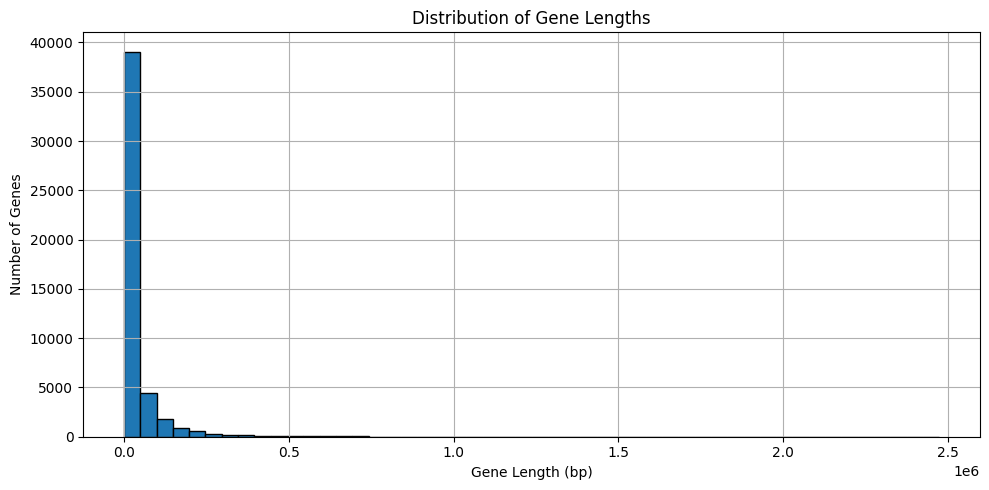

Shortest gene:
  ID      : gene-TRDD1
  Name    : TRDD1
  Product : -
  Length  : 8 bp

Longest gene:
  ID      : gene-RBFOX1
  Name    : RBFOX1
  Product : -
  Length  : 2473620 bp


In [ ]:
gff_path_human_ref = "GCF_000001405.40_GRCh38.p14_genomic.gff"  # замените на путь к вашему GFF-файлу
plot_gene_lengths(gff_path_human_ref)

In [ ]:
def find_orfs(sequence):
    start_codon = 'ATG'
    stop_codons = {'TAA', 'TAG', 'TGA'}
    sequence = sequence.upper()
    orfs = []

    for frame in range(3):  # три возможных рамки считывания
        i = frame
        while i + 3 <= len(sequence):
            codon = sequence[i:i+3]
            if codon == start_codon:
                # нашли старт, начинаем искать стоп
                j = i + 3
                while j + 3 <= len(sequence):
                    next_codon = sequence[j:j+3]
                    if next_codon in stop_codons:
                        orf_seq = sequence[i:j+3]  # включая стоп-кодон
                        orfs.append(orf_seq)
                        break  # нашли ORF — выходим, ищем следующий старт
                    j += 3
                i = j  # можно прыгнуть к стопу
            else:
                i += 3
    return orfs

In [ ]:
def find_orfs_nn(sequence):
    sequence = sequence.upper()
    stop_codons = {"TAA", "TAG", "TGA"}
    orfs = []

    # Проверка по трем фреймам
    for frame in range(3):
        i = frame
        in_orf = False
        while i + 3 <= len(sequence):
            codon = sequence[i:i+3]
            if not in_orf:
                if codon == "ATG":
                    start = i
                    in_orf = True
            else:
                if codon in stop_codons:
                    end = i + 3
                    orfs.append((start, end, frame))
                    i = end - 3  # Продолжим поиск после стоп-кодона
                    in_orf = False
            i += 3
    return orfs

# Пример
if __name__ == "__main__":
    genome = "TTGATGAAATGAAAAGTAGATGTTTTAGATGTAA"
    orfs = find_orfs_nn(genome)
    for start, end, frame in orfs:
        print(f"ORF: {start}-{end} (frame {frame}) => {genome[start:end]}")


ORF: 3-12 (frame 0) => ATGAAATGA
ORF: 19-28 (frame 1) => ATGTTTTAG
ORF: 28-34 (frame 1) => ATGTAA


In [ ]:
orfs_plus = find_orfs(sequence)
orfs_minus = find_orfs(reverse_complement(sequence))

In [ ]:
len(orfs_plus), len(orfs_minus)

(40954, 40733)

In [ ]:
orfs_plus_nn = find_orfs_nn(sequence)
orfs_minus_nn = find_orfs_nn(reverse_complement(sequence))
len(orfs_plus_nn), len(orfs_minus_nn)

(40954, 40733)

In [ ]:
orfs_plus[100]

'ATGCGACGCCGGTCGCGTCTTATCCGGCCTTCCTATATCAGGCTGTGTTTAAGACGCCGCCGCTTCGCCCAAATCCTTATGCCGGTTCGACGGCTGGACAAAATACTGTTTATCTTCCCAGCGCAGGCAGGTTAA'

In [ ]:
orfs_plus_nn[100]

'ATGCGACGCCGGTCGCGTCTTATCCGGCCTTCCTATATCAGGCTGTGTTTAAGACGCCGCCGCTTCGCCCAAATCCTTATGCCGGTTCGACGGCTGGACAAAATACTGTTTATCTTCCCAGCGCAGGCAGGTTAA'

In [ ]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/405/GCF_000001405.40_GRCh38.p14/GCF_000001405.40_GRCh38.p14_genomic.fna.gz

--2025-05-22 10:09:42--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/405/GCF_000001405.40_GRCh38.p14/GCF_000001405.40_GRCh38.p14_genomic.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.7, 130.14.250.10, 130.14.250.12, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 972898531 (928M) [application/x-gzip]
Saving to: ‘GCF_000001405.40_GRCh38.p14_genomic.fna.gz’

GCF_000001405.40_GR 100%[===================>] 927.83M  9.76MB/s    in 2m 27s  

2025-05-22 10:12:10 (6.29 MB/s) - ‘GCF_000001405.40_GRCh38.p14_genomic.fna.gz’ saved [972898531/972898531]



In [ ]:
!gzip -d GCF_000001405.40_GRCh38.p14_genomic.gff.gz

gzip: GCF_000001405.40_GRCh38.p14_genomic.gff already exists; do you wish to overwrite (y or n)? ^C


In [ ]:
import csv
from collections import defaultdict

def parse_gff(file_path):
    genes = defaultdict(list)
    with open(file_path, 'r') as file:
        reader = csv.reader(file, delimiter='\t')
        for row in reader:
            if row[0].startswith('#') or row[2] != 'gene':
                continue
            chrom = row[0]
            start = int(row[3])
            end = int(row[4])
            strand = row[6]
            genes[chrom].append((start, end, strand))
    return genes

def find_overlaps(genes):
    overlaps = []
    for chrom in genes:
        sorted_genes = sorted(genes[chrom], key=lambda x: x[0])
        for i in range(len(sorted_genes)):
            for j in range(i + 1, len(sorted_genes)):
                gene1 = sorted_genes[i]
                gene2 = sorted_genes[j]
                if gene2[0] <= gene1[1]:
                    overlaps.append((chrom, gene1, gene2))
                else:
                    break
    return overlaps

# Пример использования
gff_file = 'GCF_000005845.2_ASM584v2_genomic.gff'
genes = parse_gff(gff_file)
overlapping_genes = find_overlaps(genes)

len(overlapping_genes)
# for overlap in overlapping_genes:
#     chrom, gene1, gene2 = overlap
#     print(f'Overlap on {chrom}: {gene1} and {gene2}')

784

In [ ]:
import collections

def find_orfs_bacterial(dna_sequence: str) -> list:
    """
    Находит открытые рамки считывания (ОРФ) в геномной последовательности бактерии.

    Концепция:
    1. ОРФы начинаются с кодона метионина (ATG).
    2. ОРФы должны находиться в одной рамке считывания.
    3. ОРФы заканчиваются первым встреченным стоп-кодоном (TAA, TAG, TGA)
       в той же рамке считывания.
    4. Вложенные метионины (ATG), находящиеся внутри уже идентифицированного ОРФа
       и в той же рамке считывания, не начинают новый ОРФ.
    5. Вложенные метионины, но в другой рамке считывания, могут начинать новый ОРФ.

    Args:
        dna_sequence (str): Строка ДНК, состоящая из символов 'A', 'T', 'G', 'C'.
                            Регистр будет приведен к верхнему.

    Returns:
        list: Список словарей, где каждый словарь представляет ОРФ и содержит:
              'start': начальный индекс ОРФа (0-based) в исходной последовательности.
              'end': конечный индекс ОРФа (0-based, не включая сам конечный индекс,
                     т.е. подходит для среза dna_sequence[start:end]).
              'frame': рамка считывания (1, 2 или 3).
              'sequence': последовательность ДНК ОРФа (включая старт- и стоп-кодоны).
              'length': длина ОРФа в нуклеотидах.
    """
    if not dna_sequence:
        return []

    dna_sequence = dna_sequence.upper()
    n = len(dna_sequence)

    start_codon = "ATG"
    stop_codons = ["TAA", "TAG", "TGA"]

    found_orfs = []

    # Словарь для хранения уже идентифицированных регионов ОРФ для каждой рамки.
    # Ключ: рамка (0, 1, 2), Значение: список кортежей (start_abs_index, end_abs_index)
    # defaultdict используется для удобства, чтобы не проверять наличие ключа перед добавлением.
    identified_orf_regions_by_frame = collections.defaultdict(list)

    # Итерируем по трем возможным рамкам считывания (0, 1, 2)
    for frame_offset in range(3):

        # 1. Находим все потенциальные стартовые кодоны (ATG) в текущей рамке
        potential_atg_indices_in_frame = []
        # Идем по последовательности с шагом 3, начиная с текущего смещения рамки (frame_offset)
        # n - 2 гарантирует, что мы не выйдем за пределы строки при взятии кодона dna_sequence[i : i + 3]
        for i in range(frame_offset, n - 2, 3):
            codon = dna_sequence[i : i + 3]
            if codon == start_codon:
                potential_atg_indices_in_frame.append(i)

        # 2. Для каждого потенциального ATG ищем ОРФ
        for atg_start_index in potential_atg_indices_in_frame:

            # Проверка на вложенность в той же рамке считывания:
            # Метионин (atg_start_index) считается вложенным, если его начальная позиция
            # находится внутри уже найденного ОРФа (orf_s <= atg_start_index < orf_e).
            is_nested_in_same_frame = False
            for orf_s, orf_e in identified_orf_regions_by_frame[frame_offset]:
                if orf_s <= atg_start_index < orf_e:
                    is_nested_in_same_frame = True
                    break # Нашли вложение, дальше проверять не нужно

            if is_nested_in_same_frame:
                continue # Этот ATG вложен в ОРФ в той же рамке, пропускаем его

            # Ищем первый стоп-кодон, начиная со следующего кодона после ATG
            # Поиск также идет с шагом 3, в той же рамке считывания
            for j in range(atg_start_index + 3, n - 2, 3):
                codon = dna_sequence[j : j + 3]
                if codon in stop_codons:
                    # Стоп-кодон найден. Определяем конец ОРФа.
                    orf_end_index = j + 3 # Конечный индекс для среза (не включая сам этот индекс)

                    orf_info = {
                        "start": atg_start_index, # 0-based начальный индекс
                        "end": orf_end_index,     # 0-based конечный индекс (для среза)
                        "frame": frame_offset + 1, # Рамка 1, 2 или 3 для пользователя
                        "sequence": dna_sequence[atg_start_index:orf_end_index],
                        "length": orf_end_index - atg_start_index
                    }
                    found_orfs.append(orf_info)

                    # Запоминаем регион этого ОРФа для текущей рамки,
                    # чтобы корректно обрабатывать последующие ATG.
                    identified_orf_regions_by_frame[frame_offset].append((atg_start_index, orf_end_index))

                    # ОРФ заканчивается первым встреченным стоп-кодоном,
                    # поэтому прекращаем поиск стоп-кодонов для текущего ATG.
                    break

            # Если цикл по j завершился без break, значит стоп-кодон не был найден
            # для текущего ATG до конца последовательности в этой рамке. Такой ОРФ неполный и не добавляется.

    # Опционально: отсортировать найденные ОРФы, например, по стартовой позиции и рамке.
    found_orfs.sort(key=lambda x: (x['start'], x['frame']))

    return found_orfs

In [ ]:
orf_plus_nn = find_orfs_bacterial(sequence)
orf_minus_nn = find_orfs_bacterial(reverse_complement(sequence))
total_orfs = orf_plus_nn + orf_minus_nn
len(orf_plus_nn), len(orf_minus_nn)

(40954, 40733)

In [ ]:
for x in orf_minus_nn[100:210]:
  print(x)

{'start': 9810, 'end': 9858, 'frame': 1, 'sequence': 'ATGCAAAATCTCTTTTGCTTCAGCTTCACGTCCGCGTTCCAGCAATAA', 'length': 48}
{'start': 10003, 'end': 10087, 'frame': 2, 'sequence': 'ATGGCGTCATCGCGCCATTTCGCCTGCTCGTCGGTGACATCGTTGCCCATCAAACGCCAGGCGACGATATCGCGCAGCTCCTGA', 'length': 84}
{'start': 10124, 'end': 10202, 'frame': 3, 'sequence': 'ATGGGATCATCAGCCGTGCATTCTCAGCATCCTGCCGCGCCACACTGGCAAACGCCACCGCCGCCATTTGACGGGTAA', 'length': 78}
{'start': 10264, 'end': 10291, 'frame': 2, 'sequence': 'ATGATTGCCGAGGCGATAGTCTGGTAA', 'length': 27}
{'start': 10949, 'end': 10970, 'frame': 3, 'sequence': 'ATGCAGCGTCATGCCGCGTAA', 'length': 21}
{'start': 10959, 'end': 11043, 'frame': 1, 'sequence': 'ATGCCGCGTAATAGATTTATGCTAACCAGTCATTGCCGTTTACGCCACGTTACGGACACTTTTTTACTTTTACTGCGAGGGTGA', 'length': 84}
{'start': 11151, 'end': 12798, 'frame': 1, 'sequence': 'ATGCATCGTGTCGGCAAAGTTGTTCCGCCGAAACGTCATATTTTGAAAAACATCTCTCTGAGTTTCTTCCCTGGGGCAAAAATTGGTGTCCTGGGTCTGAATGGCGCGGGTAAGTCCACCCTGCTGCGCATTATGGCGGGCATTGATAAAGACATCGAAGGTGAAG

In [ ]:
for x in orf_plus_nn[100:210]:
  print(x)

{'start': 12016, 'end': 12058, 'frame': 2, 'sequence': 'ATGACGTGGTTTACGACCCCATTTAGTAGTCAACCGCAGTGA', 'length': 42}
{'start': 12074, 'end': 12092, 'frame': 3, 'sequence': 'ATGAAATTGGGCAGTTGA', 'length': 18}
{'start': 12130, 'end': 12175, 'frame': 2, 'sequence': 'ATGATGACCGAATATATAGTGGAGACGTTTAGATGGGTAAAATAA', 'length': 45}
{'start': 12162, 'end': 14079, 'frame': 1, 'sequence': 'ATGGGTAAAATAATTGGTATCGACCTGGGTACTACCAACTCTTGTGTAGCGATTATGGATGGCACCACTCCTCGCGTGCTGGAGAACGCCGAAGGCGATCGCACCACGCCTTCTATCATTGCCTATACCCAGGATGGTGAAACTCTAGTTGGTCAGCCGGCTAAACGTCAGGCAGTGACGAACCCGCAAAACACTCTGTTTGCGATTAAACGCCTGATTGGTCGCCGCTTCCAGGACGAAGAAGTACAGCGTGATGTTTCCATCATGCCGTTCAAAATTATTGCTGCTGATAACGGCGACGCATGGGTCGAAGTTAAAGGCCAGAAAATGGCACCGCCGCAGATTTCTGCTGAAGTGCTGAAAAAAATGAAGAAAACCGCTGAAGATTACCTGGGTGAACCGGTAACTGAAGCTGTTATCACCGTACCGGCATACTTTAACGATGCTCAGCGTCAGGCAACCAAAGACGCAGGCCGTATCGCTGGTCTGGAAGTAAAACGTATCATCAACGAACCGACCGCAGCTGCGCTGGCTTACGGTCTGGACAAAGGCACTGGCAACCGTACTATCGCGGTTTATGACCTGGGTGGTGGTACTTTCGATATTTCTATTATCGAAAT

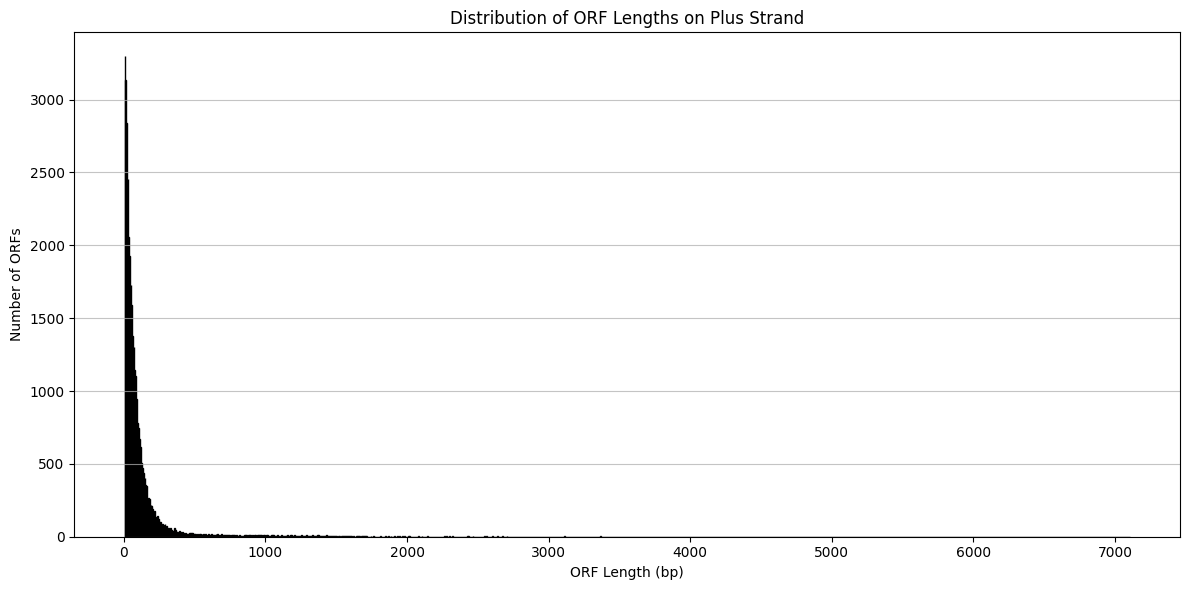

Total number of ORFs: 40954
Shortest ORF length: 6 bp
Longest ORF length:  7104 bp
Average ORF length:  123.74 bp


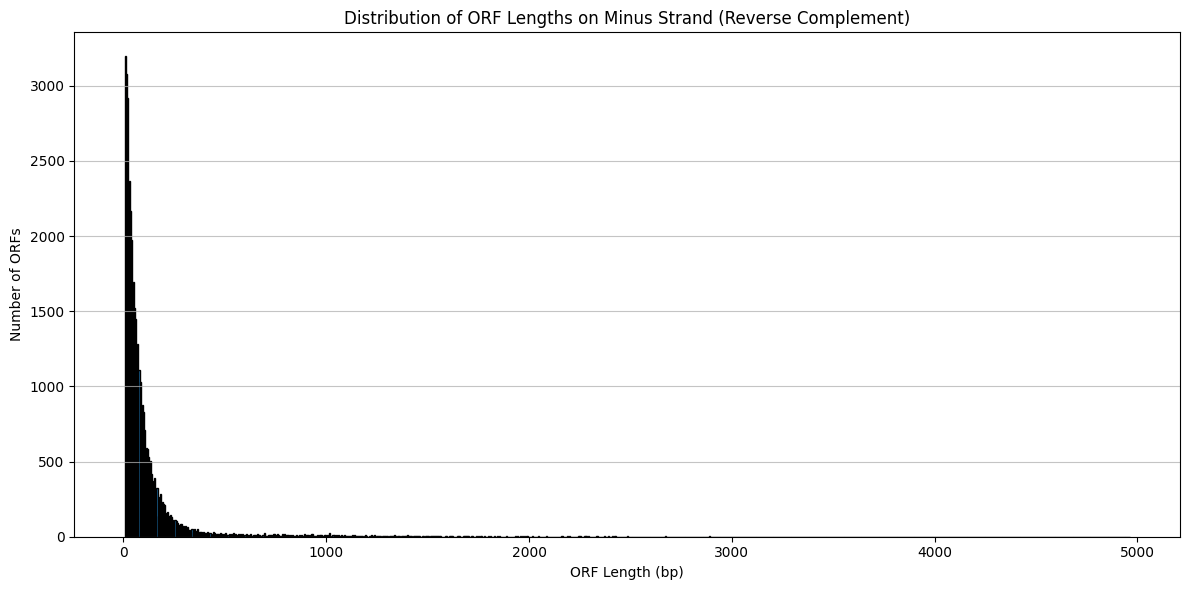

Total number of ORFs: 40733
Shortest ORF length: 6 bp
Longest ORF length:  4962 bp
Average ORF length:  125.70 bp


In [ ]:
# prompt: а мы можем распрделение длин нарисовать для orf_plus_nn

def plot_orf_length_distribution(orfs_list, title="Distribution of ORF Lengths"):
    """
    Строит гистограмму распределения длин ОРФ.

    Args:
        orfs_list (list): Список словарей, где каждый словарь представляет ОРФ
                          и содержит ключ 'length'.
        title (str): Заголовок для гистограммы.
    """
    if not orfs_list:
        print(f"No ORFs found to plot distribution for: {title}")
        return

    orf_lengths = [orf['length'] for orf in orfs_list]

    # Находим самый короткий и самый длинный ОРФ для вывода
    min_length = min(orf_lengths) if orf_lengths else 0
    max_length = max(orf_lengths) if orf_lengths else 0

    plt.figure(figsize=(12, 6))
    # Автоматически выбираем количество бинов, чтобы было достаточно деталей
    plt.hist(orf_lengths, bins='auto', edgecolor='black')
    plt.title(title)
    plt.xlabel("ORF Length (bp)")
    plt.ylabel("Number of ORFs")
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()

    print(f"Total number of ORFs: {len(orf_lengths)}")
    print(f"Shortest ORF length: {min_length} bp")
    print(f"Longest ORF length:  {max_length} bp")
    if orf_lengths:
      print(f"Average ORF length:  {sum(orf_lengths) / len(orf_lengths):.2f} bp")


# Построение распределения для orf_plus_nn
plot_orf_length_distribution(orf_plus_nn, title="Distribution of ORF Lengths on Plus Strand")

# Если вам нужно построить распределение для orfs_minus_nn тоже
orf_minus_nn = find_orfs_bacterial(reverse_complement(sequence))
plot_orf_length_distribution(orf_minus_nn, title="Distribution of ORF Lengths on Minus Strand (Reverse Complement)")


In [ ]:
!pip install Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.1/321.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
from Bio import SeqIO
import csv

def extract_orfs_from_gff(gff_file, fasta_file):
    # Считываем последовательности
    seq_dict = SeqIO.to_dict(SeqIO.parse(fasta_file, "fasta"))
    orfs = []

    with open(gff_file, 'r') as f:
        reader = csv.reader(f, delimiter='\t')
        for row in reader:
            if row[0].startswith('#') or row[2] != 'gene':
                continue
            chrom = row[0]
            start = int(row[3])-1
            end = int(row[4])
            strand = row[6]

            sequence = seq_dict[chrom].seq[start:end]  # GFF is 0-based
            if strand == '-':
                continue
                sequence = sequence.reverse_complement()

            frame = (start - 1) % 3
            orfs.append({
                'start': start,
                'end': end,
                'frame': frame,
                'sequence': str(sequence),
                'length': end - start + 1
            })

    return orfs

# Пример использования
gff_file = "GCF_000005845.2_ASM584v2_genomic.gff"
fasta_file = "GCF_000005845.2_ASM584v2_genomic.fna"
reference_orfs = extract_orfs_from_gff(gff_file, fasta_file)

for orf in reference_orfs[:15]:
    print(orf)

{'start': 189, 'end': 255, 'frame': 2, 'sequence': 'ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGA', 'length': 67}
{'start': 336, 'end': 2799, 'frame': 2, 'sequence': 'ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTGGCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTTTGACGGGACTCGCCGCCGCCCAGCCGGGGTTCCCGCTGGCGCAATTGAAAACTTTCGTCGATCAGGAATTTGCCCAAATAAAACATGTCCTGCATGGCATTAGTTTGTTGGGGCAGTGCCCGGATAGCATCAACGCTGCGCTGATTTGCCGTGGCGAGAAAATGTCGATCGCCATTATGGCCGGCGTATTAGAAGCGCGCGGTCACAACGTTACTGTTATCGATCCGGTCGAAAAACTGCTGGCAGTGGGGCATTACCTCGAATCTACCGTCGATATTGCTGAGTCCACCCGCCGTATTGCGGCAAGCCGCATTCCGGCTGATCACATGGTGCTGATGGCAGGTTTCACCGCCGGTAATGAAAAAGGCGAACTGGTGGTGCTTGGACGCAACGGTTCCGACTACTCTGCTGCGGTGCTGGCTGCCTGTTTACGCGCCGATTGTTGCGAGATTTGGACGGACGTTGACGGGGTCTATACCTGCGACCCGCGTCAGGTGCCCGATGCGAGGTTGTTGAAGTCGATGTCCTACCAGGAAGCGATGGAGCTTTCCTACTTCGGCGCTAAAGTTCTTCACCCCCGCACCATTAC

In [ ]:
len(reference_orfs), len(orf_plus_nn)

(2209, 40954)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

def orfs_to_intervals(orfs):
    return [(orf['start'], orf['end']) for orf in orfs]

def match_orfs(predicted, truth, tolerance=0):
    pred_intervals = orfs_to_intervals(predicted)
    true_intervals = orfs_to_intervals(truth)
    matched_true = set()
    tp = 0
    fp = 0

    for p in pred_intervals:
        found = False
        for idx, t in enumerate(true_intervals):
            if idx in matched_true:
                continue
            # Допускаем погрешность (например, +/- 3 нуклеотида)
            if abs(p[0] - t[0]) <= tolerance and abs(p[1] - t[1]) <= tolerance:
                tp += 1
                matched_true.add(idx)
                found = True
                break
        if not found:
            fp += 1

    fn = len(true_intervals) - len(matched_true)
    return tp, fp, fn

def compute_metrics(tp, fp, fn):
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall    = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1        = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
    accuracy  = tp / (tp + fp + fn) if (tp + fp + fn) > 0 else 0.0
    return {
        'TP': tp,
        'FP': fp,
        'FN': fn,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1 Score': round(f1, 4),
    }

def print_metrics_table(metrics):
    df = pd.DataFrame([metrics])
    print(df.to_string(index=False))

# 📦 Пример использования
# orfs1 = [...]  # предсказания
# orfs2 = [...]  # истинные ORF'ы

# Пример:
# orfs1 = [{'start': 100, 'end': 200}, {'start': 300, 'end': 400}]
# orfs2 = [{'start': 100, 'end': 200}, {'start': 500, 'end': 600}]

def evaluate_datasets(orf_plus_nn, reference_orfs, tolerance=0):
    tp, fp, fn = match_orfs(orf_plus_nn, reference_orfs, tolerance)
    metrics = compute_metrics(tp, fp, fn)
    print_metrics_table(metrics)

In [ ]:
evaluate_datasets(orf_plus_nn, reference_orfs, tolerance=0)

 TP    FP   FN  Accuracy  Precision  Recall  F1 Score
  0 40954 2209       0.0        0.0     0.0       0.0


In [ ]:
evaluate_datasets(orf_plus_nn, reference_orfs, tolerance=5)

  TP    FP  FN  Accuracy  Precision  Recall  F1 Score
1590 39364 619    0.0382     0.0388  0.7198    0.0737


In [ ]:
evaluate_datasets(orf_plus_nn, reference_orfs, tolerance=0)

  TP    FP  FN  Accuracy  Precision  Recall  F1 Score
1569 39385 640    0.0377     0.0383  0.7103    0.0727


In [ ]:
len(orf_plus_nn)

40954

In [ ]:
for x in orf_plus_nn[:100]:
  print(x)

{'start': 29, 'end': 98, 'frame': 3, 'sequence': 'ATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAA', 'length': 69}
{'start': 189, 'end': 255, 'frame': 1, 'sequence': 'ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGA', 'length': 66}
{'start': 336, 'end': 2799, 'frame': 1, 'sequence': 'ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTGGCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTTTGACGGGACTCGCCGCCGCCCAGCCGGGGTTCCCGCTGGCGCAATTGAAAACTTTCGTCGATCAGGAATTTGCCCAAATAAAACATGTCCTGCATGGCATTAGTTTGTTGGGGCAGTGCCCGGATAGCATCAACGCTGCGCTGATTTGCCGTGGCGAGAAAATGTCGATCGCCATTATGGCCGGCGTATTAGAAGCGCGCGGTCACAACGTTACTGTTATCGATCCGGTCGAAAAACTGCTGGCAGTGGGGCATTACCTCGAATCTACCGTCGATATTGCTGAGTCCACCCGCCGTATTGCGGCAAGCCGCATTCCGGCTGATCACATGGTGCTGATGGCAGGTTTCACCGCCGGTAATGAAAAAGGCGAACTGGTGGTGCTTGGACGCAACGGTTCCGACTACTCTGCTGCGGTGCTGGCTGCCTGTTTACGCGCCGATTGTTGCGAGATTT

In [ ]:
orf_plus_filtered_nn = [x for x in orf_plus_nn if x["length"] > 5 * 3]

In [ ]:
len(orf_plus_filtered_nn)

34519

In [ ]:
evaluate_datasets(orf_plus_filtered_nn, reference_orfs, tolerance=0)

  TP    FP  FN  Accuracy  Precision  Recall  F1 Score
1569 32950 640    0.0446     0.0455  0.7103    0.0854


In [ ]:
#   TP    FP  FN  Accuracy  Precision  Recall  F1 Score
# 1569 39385 640    0.0377     0.0383  0.7103    0.0727
# 1569 32950 640    0.0446     0.0455  0.7103    0.0854
# 1557 17281 652    0.0799     0.0827  0.7048     0.148


In [ ]:
def tag_orfs(predicted, truth, tolerance=0):
    pred_intervals = [(p['start'], p['end']) for p in predicted]
    true_intervals = [(t['start'], t['end']) for t in truth]

    matched_pred = set()
    matched_true = set()

    tagged_pred = []
    tagged_true = []

    for i, p in enumerate(pred_intervals):
        matched = False
        for j, t in enumerate(true_intervals):
            if j in matched_true:
                continue
            if abs(p[0] - t[0]) <= tolerance and abs(p[1] - t[1]) <= tolerance:
                matched_pred.add(i)
                matched_true.add(j)
                matched = True
                break
        tag = 'TP' if matched else 'FP'
        tagged_pred.append({**predicted[i], 'type': tag})

    for j, t in enumerate(true_intervals):
        tag = 'TP' if j in matched_true else 'FN'
        tagged_true.append({**truth[j], 'type': tag})

    return tagged_pred, tagged_true

In [ ]:
predicted_tagged, true_tagged = tag_orfs(orf_plus_filtered_nn, reference_orfs, tolerance=0)

# Пример вывода
import pandas as pd

df_pred = pd.DataFrame(predicted_tagged)
df_true = pd.DataFrame(true_tagged)

print("Предсказания:")
print(df_pred[['start', 'end', 'type']].to_string(index=False))

print("\nИстина:")
print(df_true[['start', 'end', 'type']].to_string(index=False))

Streaming output truncated to the last 5000 lines.
4278478 4279828   TP
4278986 4279031   FP
4279187 4279208   FP
4279289 4279376   FP
4279556 4279577   FP
4279637 4279679   FP
4279749 4279896   FP
4279805 4279937   FP
4279858 4280137   FP
4279979 4281629   TP
4280124 4280154   FP
4280184 4280319   FP
4280358 4280439   FP
4280442 4280469   FP
4280625 4280682   FP
4281138 4281222   FP
4281435 4281612   FP
4281715 4281802   FP
4281830 4281854   FP
4281863 4281899   FP
4281921 4281999   FP
4282217 4282235   FP
4282279 4282360   FP
4282397 4282415   FP
4282411 4282510   FP
4282497 4282539   FP
4282676 4282718   FP
4282808 4282847   FP
4282846 4282918   FP
4282901 4282946   FP
4282955 4282979   FP
4283161 4283179   FP
4283183 4283345   FP
4283196 4283256   FP
4283370 4283439   FP
4283562 4283628   FP
4283747 4283822   FP
4283761 4283803   FP
4283877 4283979   FP
4283897 4284593   FP
4284060 4284360   FP
4284552 4284588   FP
4284637 4284694   FP
4284756 4284936   FP
4284916 4285090   FP
4285

In [ ]:
def print_errors_only(tagged_predicted, tagged_truth):
    print("\nОшибки в предсказаниях (FP):")
    for orf in tagged_predicted:
        if orf['type'] != 'TP':
            print(f"END: {orf['end']} | TYPE: {orf['type']} | SEQUENCE: {orf['sequence']}")

    print("\nПропущенные гены (FN):")
    for orf in tagged_truth:
        if orf['type'] != 'TP':
            print(f"END: {orf['end']} | TYPE: {orf['type']} | SEQUENCE: {orf['sequence']}")

In [ ]:
predicted_tagged, truth_tagged = tag_orfs(orf_plus_filtered_nn, reference_orfs, tolerance=0)
print_errors_only(predicted_tagged, truth_tagged)

In [ ]:
def tag_orfs_with_start_stop_analysis(predicted, truth):
    matched_true = set()
    tagged_pred = []
    tagged_true = []

    for i, p in enumerate(predicted):
        match_type = 'FP'
        for j, t in enumerate(truth):
            if j in matched_true:
                continue

            match_start = p['start'] == t['start']
            match_end = p['end'] == t['end']

            if match_start and match_end:
                matched_true.add(j)
                match_type = 'TP-full'
                break
            elif match_start:
                matched_true.add(j)
                match_type = 'TP-start'
                break
            elif match_end:
                matched_true.add(j)
                match_type = 'TP-end'
                break

        tagged_pred.append({**p, 'type': match_type})

    for j, t in enumerate(truth):
        tag = 'FN' if j not in matched_true else 'TP'
        tagged_true.append({**t, 'type': tag})

    return tagged_pred, tagged_true

In [ ]:
from collections import Counter

def summarize_start_stop_errors(tagged_pred):
    counter = Counter([orf['type'] for orf in tagged_pred])
    print("\nАнализ ошибок по совпадениям:")
    for key in ['TP-full', 'TP-start', 'TP-end', 'FP']:
        print(f"{key}: {counter.get(key, 0)}")

In [ ]:
predicted_tagged, true_tagged = tag_orfs_with_start_stop_analysis(orf_plus_filtered_nn, reference_orfs)
summarize_start_stop_errors(predicted_tagged)


Анализ ошибок по совпадениям:
TP-full: 1569
TP-start: 1
TP-end: 505
FP: 32444


In [ ]:
import collections
import statistics
import re # Может понадобиться для более сложных операций с мотивами, пока не используется активно

# --- Вспомогательные функции ---

def read_fasta(filepath: str) -> dict:
    """
    Читает FASTA файл и возвращает словарь {заголовок: последовательность}.
    Заголовком считается первая часть до пробела. Последовательности приводятся к верхнему регистру.
    """
    sequences = {}
    current_seq_header = None
    current_seq_list = []
    try:
        with open(filepath, 'r') as f:
            for line in f:
                line = line.strip()
                if not line: # Пропускаем пустые строки
                    continue
                if line.startswith(">"):
                    if current_seq_header: # Сохраняем предыдущую последовательность
                        sequences[current_seq_header] = "".join(current_seq_list)
                    current_seq_header = line[1:].split()[0] # Берем ID до первого пробела
                    current_seq_list = []
                else:
                    if current_seq_header: # Убедимся, что заголовок уже был
                        current_seq_list.append(line.upper()) # Приводим к верхнему регистру
        if current_seq_header: # Сохраняем последнюю последовательность в файле
            sequences[current_seq_header] = "".join(current_seq_list)
    except FileNotFoundError:
        print(f"Ошибка: Файл {filepath} не найден.")
        raise # Передаем исключение дальше
    if not sequences:
        print(f"Предупреждение: Файл {filepath} пуст или не содержит последовательностей в формате FASTA.")
    return sequences

def reverse_complement(dna_seq: str) -> str:
    """Вычисляет обратную комплементарную последовательность ДНК."""
    if not isinstance(dna_seq, str):
        raise TypeError("Input sequence must be a string.")
    # Убедимся, что последовательность в верхнем регистре перед трансляцией
    complement_map = str.maketrans("ATGC", "TACG")
    return dna_seq.upper().translate(complement_map)[::-1]

# --- Функция обучения параметров ---

def train_orf_parameters(
    gff_filepath: str,
    reference_fasta_filepath: str,
    candidate_sd_motifs: list,
    sd_upstream_window_rel_to_atg: tuple = (-15, -4) # (-15 до -5 включительно)
) -> dict:
    """
    Вычисляет параметры для фильтрации ОРФов на основе референсного GFF и генома.

    Args:
        gff_filepath: Путь к GFF3 файлу.
        reference_fasta_filepath: Путь к FASTA файлу референсного генома.
        candidate_sd_motifs: Список предполагаемых SD-мотивов для проверки (например, ["AGGAGG", "AAGGAG"]).
        sd_upstream_window_rel_to_atg: Кортеж (старт, конец_не_включая) определяющий окно
                                      перед 'A' кодона ATG (A=0) для поиска SD-мотивов.
                                      Например, (-15, -4) означает с -15 п.н. (включительно) до -4 п.н. (не включая).
    Returns:
        Словарь с натренированными параметрами или пустой словарь при ошибке.
    """
    print(f"Запуск обучения параметров ОРФ из {gff_filepath} и {reference_fasta_filepath}...")

    try:
        reference_genome_dict = read_fasta(reference_fasta_filepath)
        if not reference_genome_dict:
            print(f"Ошибка: Не удалось прочитать последовательности из {reference_fasta_filepath}.")
            return {}
    except FileNotFoundError:
        # read_fasta уже печатает сообщение, можно просто вернуть пустой словарь
        return {}

    all_ref_cds_sequences_oriented = []

    print("Парсинг GFF для извлечения CDS признаков...")
    cds_found_in_gff_total = 0
    cds_processed_valid = 0
    skipped_stats = collections.defaultdict(int)

    try:
        with open(gff_filepath, 'r') as f_gff:
            for line_num, line in enumerate(f_gff, 1):
                if line.startswith("#") or not line.strip():
                    continue
                parts = line.strip().split('\t')
                if len(parts) < 9:
                    skipped_stats['invalid_gff_line_format'] +=1
                    continue

                feature_type = parts[2]
                if feature_type.upper() == 'CDS':
                    cds_found_in_gff_total += 1
                    seq_id = parts[0]
                    try:
                        gff_start_1based = int(parts[3])
                        gff_end_1based = int(parts[4])
                    except ValueError:
                        skipped_stats['invalid_cds_coordinates'] +=1
                        continue

                    strand = parts[6]
                    if strand not in ['+', '-']:
                        skipped_stats['invalid_cds_strand'] +=1
                        continue

                    if seq_id not in reference_genome_dict:
                        skipped_stats['seq_id_not_in_fasta'] +=1
                        continue

                    contig_sequence = reference_genome_dict[seq_id]
                    contig_len = len(contig_sequence)

                    cds_genomic_start_0based = gff_start_1based - 1
                    cds_genomic_end_0based_exclusive = gff_end_1based

                    if not (0 <= cds_genomic_start_0based < cds_genomic_end_0based_exclusive <= contig_len):
                        skipped_stats['cds_coords_out_of_bounds'] +=1
                        continue

                    cds_fragment_on_contig = contig_sequence[cds_genomic_start_0based : cds_genomic_end_0based_exclusive]

                    oriented_cds_sequence = cds_fragment_on_contig
                    if strand == '-':
                        oriented_cds_sequence = reverse_complement(cds_fragment_on_contig)

                    if not oriented_cds_sequence.startswith("ATG"):
                        skipped_stats['cds_not_starting_ATG'] +=1
                        continue
                    if len(oriented_cds_sequence) % 3 != 0:
                        skipped_stats['cds_len_not_multiple_of_3'] +=1
                        continue
                    stop_codon = oriented_cds_sequence[-3:]
                    if stop_codon not in ["TAA", "TAG", "TGA"]:
                        skipped_stats['cds_no_standard_stop'] +=1
                        continue

                    all_ref_cds_sequences_oriented.append(oriented_cds_sequence)
                    cds_processed_valid +=1
    except FileNotFoundError:
        print(f"Ошибка: GFF файл {gff_filepath} не найден.")
        return {} # Возвращаем пустой словарь
    except Exception as e:
        print(f"Произошла ошибка при чтении GFF файла {gff_filepath}: {e}")
        return {}


    print(f"  Всего найдено CDS записей в GFF: {cds_found_in_gff_total}")
    for reason, count in skipped_stats.items():
        print(f"  Пропущено CDS по причине '{reason}': {count}")
    print(f"  Используется {cds_processed_valid} валидных референсных CDS для обучения.")

    if not all_ref_cds_sequences_oriented:
        print("Ошибка: Не найдено валидных CDS в GFF для обучения. Проверьте GFF, FASTA и их соответствие.")
        return {}

    all_codons_for_stats = []
    gc1_vals, gc2_vals, gc3_vals = [], [], []

    for cds_seq in all_ref_cds_sequences_oriented:
        # Анализируем кодоны, исключая стоп-кодон, для таблиц частот и GC-статистики
        # Старт-кодон (ATG) включается в анализ кодонов
        for i in range(0, len(cds_seq) - 3, 3): # -3 чтобы исключить стоп-кодон
            codon = cds_seq[i:i+3]
            all_codons_for_stats.append(codon)

            gc1_vals.append(1 if codon[0] in 'GC' else 0)
            gc2_vals.append(1 if codon[1] in 'GC' else 0)
            gc3_vals.append(1 if codon[2] in 'GC' else 0)

    if not all_codons_for_stats: # Должно быть избыточным, если all_ref_cds_sequences_oriented не пуст
        print("Ошибка: Не удалось извлечь кодоны из референсных CDS. Обучение невозможно.")
        return {}

    codon_counts = collections.Counter(all_codons_for_stats)
    total_valid_codons = sum(codon_counts.values())
    codon_frequencies_ref = {c: count / total_valid_codons for c, count in codon_counts.items()}

    mean_gc3_ref = statistics.mean(gc3_vals) if gc3_vals else 0.5 # 0.5 как нейтральное значение
    std_gc3_ref = statistics.stdev(gc3_vals) if len(gc3_vals) > 1 else 0.0 # Если 0 или 1 значение, stdev не определен или 0

    trained_params = {
        "codon_frequencies_reference": codon_frequencies_ref,
        "gc3_mean_reference": mean_gc3_ref,
        "gc3_std_reference": std_gc3_ref,
        "sd_motifs_to_check": candidate_sd_motifs,
        "sd_search_window_rel_to_atg": sd_upstream_window_rel_to_atg
    }
    print("Обучение параметров завершено.")
    print(f"  Референсная частота кодонов: {len(trained_params['codon_frequencies_reference'])} типов кодонов")
    print(f"  GC3 среднее (реф): {trained_params['gc3_mean_reference']:.3f}")
    print(f"  GC3 станд.откл. (реф): {trained_params['gc3_std_reference']:.3f}")
    print(f"  SD мотивы для проверки: {trained_params['sd_motifs_to_check']}")
    print(f"  Окно поиска SD (относительно A в ATG=0): {trained_params['sd_search_window_rel_to_atg']}")
    return trained_params

# --- Исходная функция поиска ОРФов ---
def find_initial_orfs(dna_sequence: str, min_aa_length: int = 5) -> list:
    """
    Находит потенциальные ОРФы, начинающиеся с ATG и заканчивающиеся стоп-кодоном.
    ОРФы должны иметь минимальную длину в аминокислотах (включая стартовый метионин, не считая стоп).
    """
    if not dna_sequence or not isinstance(dna_sequence, str):
        return []
    dna_sequence = dna_sequence.upper()
    n = len(dna_sequence)
    start_codon = "ATG"
    stop_codons = ["TAA", "TAG", "TGA"]
    # Минимальная длина ОРФа в нуклеотидах: (min_aa_length + 1 стоп-кодон) * 3
    # или (min_aa_length для белка, значит min_aa_length кодонов + стартовый кодон)
    # Если min_aa_length = 5, то это Met + 4 AA + Stop = 6 кодонов = 18 п.н.
    min_orf_len_nt = (min_aa_length + 1) * 3 # +1 для стартового кодона, если min_aa_length это число кодируемых AA после Met.
                                            # Если min_aa_length включает Met, то (min_aa_length) * 3 для AA + 3 для Stop.
                                            # Давайте считать min_aa_length как число кодируемых аминокислот ПОСЛЕ старта ИЛИ ВКЛЮЧАЯ старт.
                                            # "короче пяти аминокислот" -> белок < 5 АА. Значит, белок >= 5АА.
                                            # Met + 4AA + Stop -> 5 AA в белке. 6 кодонов. 18 п.н.
    min_orf_len_nt = min_aa_length * 3 + 3 # Met + (N-1) AA + Stop. So N codons for protein. N*3 + 3 for Stop.
                                           # Если min_aa_length = 5 (5 аминокислот в белке), то 5*3 (для Met+4AA) + 3 (для Stop) = 18 п.н.

    found_orfs_details = []
    # Словарь для хранения уже идентифицированных регионов ОРФ для каждой рамки.
    # Ключ: рамка (0, 1, 2), Значение: список кортежей (start_abs_index, end_abs_index)
    identified_orf_regions_by_frame = collections.defaultdict(list)

    for frame_offset in range(3):
        potential_atg_indices = []
        for i in range(frame_offset, n - 2, 3): # n-2 чтобы codon был полным
            if dna_sequence[i : i + 3] == start_codon:
                potential_atg_indices.append(i)

        for atg_start_idx in potential_atg_indices:
            is_nested = False
            for orf_s, orf_e in identified_orf_regions_by_frame[frame_offset]:
                if orf_s <= atg_start_idx < orf_e: # Вложенный, если начало ATG внутри существующего ОРФа
                    is_nested = True
                    break
            if is_nested:
                continue

            # Ищем первый стоп-кодон, начиная со следующего кодона после ATG
            for j in range(atg_start_idx + 3, n - 2, 3):
                codon = dna_sequence[j : j + 3]
                if codon in stop_codons:
                    orf_end_idx = j + 3 # Конечный индекс для среза (не включая)
                    orf_seq = dna_sequence[atg_start_idx:orf_end_idx]
                    orf_len = len(orf_seq)

                    if orf_len >= min_orf_len_nt:
                        orf_info = {
                            "start_0based": atg_start_idx,
                            "end_0based_exclusive": orf_end_idx,
                            "frame": frame_offset + 1, # 1-based frame для пользователя
                            "sequence": orf_seq, # Включает старт- и стоп-кодоны
                            "length": orf_len
                        }
                        found_orfs_details.append(orf_info)
                        # Запоминаем регион этого ОРФа для текущей рамки
                        identified_orf_regions_by_frame[frame_offset].append((atg_start_idx, orf_end_idx))
                    break # ОРФ заканчивается первым стоп-кодоном

    # Опционально: отсортировать ОРФы, например, по стартовой позиции
    found_orfs_details.sort(key=lambda x: (x['start_0based'], x['frame']))
    return found_orfs_details

# --- Расширенная функция поиска ОРФов с фильтрацией ---
def find_orfs_enhanced(
    dna_to_analyze: str,
    trained_parameters: dict,
    min_aa_length: int = 5,
    gc3_std_dev_multiplier: float = 2.0 # Количество стандартных отклонений для GC3 порога
) -> list:
    """
    Находит ОРФы и фильтрует их, используя натренированные параметры (SD мотивы, GC3 смещение).
    ОРФы должны пройти ОБА фильтра.
    """
    if not trained_parameters:
        print("Ошибка: Параметры для фильтрации не натренированы или пусты. Запустите train_orf_parameters.")
        return []
    if not dna_to_analyze or not isinstance(dna_to_analyze, str):
        print("Ошибка: Предоставлена некорректная или пустая последовательность ДНК для анализа.")
        return []

    print(f"Запуск расширенного поиска ОРФов на последовательности длиной {len(dna_to_analyze)}...")
    dna_to_analyze = dna_to_analyze.upper()

    initial_orfs = find_initial_orfs(dna_to_analyze, min_aa_length)
    print(f"  Найдено {len(initial_orfs)} первоначальных ОРФов (длина >= {min_aa_length} а.к.). Применение фильтров...")

    filtered_orfs = []

    # Извлечение параметров для удобства
    sd_motifs_to_check = trained_parameters.get("sd_motifs_to_check", [])
    sd_search_window_rel_to_atg = trained_parameters.get("sd_search_window_rel_to_atg", (-15,-4))
    gc3_mean_ref = trained_parameters.get("gc3_mean_reference", 0.5) # Нейтральное значение по умолчанию
    gc3_std_ref = trained_parameters.get("gc3_std_reference", 0.0)

    sd_win_start_rel, sd_win_end_rel_excl = sd_search_window_rel_to_atg

    orfs_passed_sd_count = 0
    orfs_passed_all_count = 0

    for orf in initial_orfs:
        # 1. Фильтр по SD-последовательности
        has_sd_signal = False
        if sd_motifs_to_check: # Применять фильтр только если есть мотивы для проверки
            orf_genomic_start_0based = orf["start_0based"]

            # Абсолютные координаты окна для поиска SD в dna_to_analyze
            upstream_search_abs_start = orf_genomic_start_0based + sd_win_start_rel
            upstream_search_abs_end_excl = orf_genomic_start_0based + sd_win_end_rel_excl

            # Окно должно быть перед ATG (т.е. upstream_search_abs_end_excl <= orf_genomic_start_0based)
            # и в пределах последовательности (upstream_search_abs_start >= 0)
            if upstream_search_abs_start >= 0 and \
               upstream_search_abs_end_excl <= orf_genomic_start_0based and \
               upstream_search_abs_end_excl > upstream_search_abs_start: # Окно должно иметь положительную длину

                upstream_sequence_for_sd = dna_to_analyze[upstream_search_abs_start : upstream_search_abs_end_excl]
                for motif in sd_motifs_to_check:
                    if motif in upstream_sequence_for_sd: # Простая проверка на вхождение
                        has_sd_signal = True
                        break
        else: # Если SD мотивы не заданы, считаем, что фильтр пройден (или не применяется)
            has_sd_signal = True

        if not has_sd_signal:
            continue # Не прошел SD фильтр, переходим к следующему ОРФу
        orfs_passed_sd_count +=1

        # 2. Фильтр по GC3-составу
        orf_codons_for_gc3 = []
        # Анализируем кодоны ОРФа, исключая стоп-кодон. Старт-кодон (ATG) включается.
        for i in range(0, orf["length"] - 3, 3): # -3 чтобы отрезать стоп-кодон
            codon = orf["sequence"][i:i+3]
            orf_codons_for_gc3.append(codon)

        if not orf_codons_for_gc3:
            # Это может случиться, если ОРФ состоит только из старт-стоп (т.е. min_aa_length = 0)
            # При min_aa_length=5, здесь всегда будут кодоны.
            continue

        orf_gc3_values = [1 if c[2] in 'GC' else 0 for c in orf_codons_for_gc3]
        orf_mean_gc3 = statistics.mean(orf_gc3_values) # Должен быть хотя бы 1 кодон (старт)

        gc3_passes_filter = False
        if gc3_std_ref < 1e-6: # Если стандартное отклонение в референсе очень мало (или 0)
            # Ожидаем почти точное совпадение со средним референсным
            if abs(orf_mean_gc3 - gc3_mean_ref) < 0.01: # Допуск на небольшие отклонения
                gc3_passes_filter = True
        else:
            lower_bound = gc3_mean_ref - gc3_std_dev_multiplier * gc3_std_ref
            upper_bound = gc3_mean_ref + gc3_std_dev_multiplier * gc3_std_ref
            if lower_bound <= orf_mean_gc3 <= upper_bound:
                gc3_passes_filter = True

        if not gc3_passes_filter:
            continue # Не прошел GC3 фильтр

        # Если ОРФ прошел все фильтры
        filtered_orfs.append(orf)
        orfs_passed_all_count +=1

    print(f"  ОРФов прошло SD фильтр: {orfs_passed_sd_count}")
    print(f"  ОРФов прошло GC3 фильтр (из тех, что прошли SD): {orfs_passed_all_count}") # Это и есть финальное число
    print(f"Расширенный поиск ОРФов завершен. {len(filtered_orfs)} ОРФов прошли все фильтры.")
    return filtered_orfs

# --- Пример использования ---
if __name__ == '__main__':
    # Создадим фиктивные файлы для примера
    # Референсный геном (FASTA)
    with open("reference_genome.fasta", "w") as f:
        f.write(">ref_contig_1\n")
        # Участок 1: AGGAGG NNNNNNN ATG GGC TTC TAA (SD в -15 до -10 отн. A из ATG -> A=pos 18)
        #            012345678901234567890123456789
        # CCAGGAGGCTATGCATGGGCCTTTTAACCCCGCTAG (Длина 38. ATG на 18 (0-based))
        #  AGGAGG в [2:8]. ATG в [18:21]. Upstream окно для ATG[18]: [18-15 : 18-4] = [3:14] -> "AGGCTATGCA"
        f.write("CCAGGAGGCTATGCATGGGCCTTTTAACCCCGCTAG") # Ген1: ATG GGC TTC TAA (GC3 у GGC,TTC,TAA: C,C,A. Без стопа: C,C = 1.0)
        # Участок 2: без явного SD ... ATG ... STOP ...
        # ATTAAACCATGCCCGGGTAGCCCCGCTAGATTACG (Длина 35. ATG на 8)
        # Upstream окно для ATG[8]: [8-15 : 8-4] = [-7 : 4] -> не подходит
        f.write("ATTAAACCATGCCCGGGTAGCCCCGCTAGATTACG")  # Ген2: ATG CCC GGG TAG (GC3 у CCC,GGG,TAG: C,G,G. Без стопа: C,G = 1.0)
        # Участок 3: другой SD, другой GC3
        # TTTAAGGAGTAAAATGAAACCCTGAAGGCCTTAA (Длина 34. ATG на 13)
        #  AAGGAG в [3:9]. Upstream окно для ATG[13]: [13-15 : 13-4] = [-2:9] -> не подходит
        f.write("TTTAAGGAGTAAAATGAAACCCTGAAGGCCTTAA\n") # Ген3: ATG AAA CCC TGA (GC3 у AAA,CCC,TGA: A,C,A. Без стопа: A,C = 0.5)

    # Референсная аннотация (GFF)
    with open("reference_annotation.gff", "w") as f:
        f.write("##gff-version 3\n")
        # Ген 1: Координаты ATG GGC TTC TAA в "CCAGGAGGCTATGCATGGGCCTTTTAACCCCGCTAG"
        # ATG начинается на 19-й позиции (1-based). Длина ОРФа 12.
        f.write("ref_contig_1\tRefSeq\tCDS\t19\t30\t.\t+\t0\tID=cds1;Parent=gene1\n")
        # Ген 2: Координаты ATG CCC GGG TAG в "ATTAAACCATGCCCGGGTAGCCCCGCTAGATTACG"
        # ATG начинается на 9-й позиции (1-based). Длина ОРФа 12.
        f.write("ref_contig_1\tRefSeq\tCDS\t47\t58\t.\t+\t0\tID=cds2;Parent=gene2\n") # Исправлены координаты относительно начала строки гена2 (38+9=47)
        # Ген 3: Координаты ATG AAA CCC TGA в "TTTAAGGAGTAAAATGAAACCCTGAAGGCCTTAA"
        # ATG начинается на 14-й позиции (1-based). Длина ОРФа 12.
        f.write("ref_contig_1\tRefSeq\tCDS\t87\t98\t.\t+\t0\tID=cds3;Parent=gene3\n") # Исправлены координаты (38+35+14=87)


    # Последовательность для анализа (длинная, чтобы было где искать)
    # Используем конкатенацию тех же участков, чтобы проверить предсказания
    dna_to_predict = (
        "XXXAGGAGGCTATGCATGGGCCTTTAAYYY" + # ОРФ1, хороший SD
        "ZZZATTAAACCATGCCCGGGTAGTTT" +   # ОРФ2, плохой SD
        "AAATTTTAAGGAGTAAAATGAAACCCTGATTT" # ОРФ3, другой хороший SD
        "GGGAGGAGGAAAAATGAAATTCTAGCCC" + # ОРФ4, хороший SD, короткий
        "AATGCCCTAA"                     # ОРФ5, без SD, короткий
    )


    # 1. Обучаем параметры
    candidate_sd_motifs_to_use = ["AGGAGG", "AAGGAG", "GAGAGG"]
    sd_window = (-15, -4) # от -15 до -5 включительно, относительно A из ATG

    try:
        trained_params = train_orf_parameters(
            "reference_annotation.gff",
            "reference_genome.fasta",
            candidate_sd_motifs_to_use,
            sd_window
        )

        if trained_params: # Убедимся, что обучение прошло успешно
            # 2. Ищем ОРФы на новой последовательности
            final_orfs = find_orfs_enhanced(
                dna_to_predict,
                trained_params,
                min_aa_length=3, # Поставим 3 для примера, чтобы короткие ОРФы тоже нашлись изначально
                gc3_std_dev_multiplier=2.0
            )

            print("\n--- Найденные и отфильтрованные ОРФы ---")
            if final_orfs:
                for orf in final_orfs:
                    print(f"Старт: {orf['start_0based']}, Рамка: {orf['frame']}, "
                          f"Длина: {orf['length']} п.н., Последовательность: {orf['sequence']}")
            else:
                print("Отфильтрованных ОРФов не найдено.")
    except Exception as e:
        print(f"Произошла общая ошибка в процессе выполнения: {e}")
        import traceback
        traceback.print_exc()

Запуск обучения параметров ОРФ из reference_annotation.gff и reference_genome.fasta...
Парсинг GFF для извлечения CDS признаков...
  Всего найдено CDS записей в GFF: 3
  Пропущено CDS (нет ID контига в FASTA): 0
  Пропущено CDS (не начинаются с ATG): 3
  Пропущено CDS (длина не кратна 3): 0
  Пропущено CDS (нет стандартного стоп-кодона): 0
  Используется 0 валидных референсных CDS для обучения.
Произошла ошибка: Не найдено валидных CDS в GFF для обучения. Проверьте GFF, FASTA и их соответствие.


In [ ]:
import matplotlib.pyplot as plt

def gc_content(seq):
    seq = seq.upper()
    g = seq.count('G')
    c = seq.count('C')
    return 100 * (g + c) / len(seq) if len(seq) > 0 else 0

def compare_gc_by_type(tagged_pred):
    tp_gc = []
    fp_gc = []

    for orf in tagged_pred:
        gc = gc_content(orf['sequence'])
        if orf['type'] == 'TP-full':
            tp_gc.append(gc)
        elif orf['type'] == 'FP':
            fp_gc.append(gc)

    # Средние значения
    print(f"\nСредний GC-состав:")
    print(f"TP-full: {sum(tp_gc)/len(tp_gc):.2f}% (n={len(tp_gc)})")
    print(f"FP     : {sum(fp_gc)/len(fp_gc):.2f}% (n={len(fp_gc)})")

    # Гистограмма
    plt.hist(tp_gc, bins=20, alpha=0.7, label='TP-full')
    plt.hist(fp_gc, bins=20, alpha=0.7, label='FP')
    plt.xlabel('GC-состав (%)')
    plt.ylabel('Частота')
    plt.title('Сравнение GC-состава: TP-full vs FP')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
compare_gc_by_type(tagged_predicted)

NameError: name 'tagged_predicted' is not defined